# TAREA SEMANA 3 : FUNDAMENTOS DE PYTHON
## Nombre : Salvador Trejo Espinosa

### Ejercicio 1
Escribir dos funciones que simulan una calculadora científica que permita calcular el seno, coseno, tangente, exponencial y logaritmo neperiano o natural (logaritmo en base euler). 

A.- La función uno preguntará al usuario el intervalo donde quiere aplicar la función matemática y la función a aplicar, y mostrará por pantalla una tabla donde la primera columna será los valores del intervalo dado (x) y la columna 2 tendrá los resultados de el resultado de aplicar la función a este intervalo (y).

B.- La función dos graficara con matplotlib el resultado de función anterior y la mostrará en pantalla. Recuerden poner los títulos ejes y demás configuraciones de las gráficas para que queden de la mejor manera posible.


Ingrese el intervalo de inicio: -3
Ingrese el intervalo de fin: 3
ingrese el nombre de la funcion a ejecutar (sin, cos, tan, exp, log): sin
x	 y
-----------------
-3.0000	-0.1411
-2.0000	-0.9093
-1.0000	-0.8415
0.0000	0.0000
1.0000	0.8415
2.0000	0.9093
3.0000	0.1411


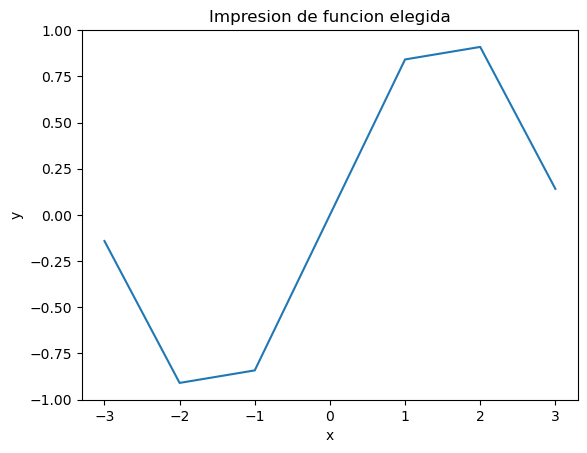

In [22]:
import math  # importamos liberia para poder hacer las funciones matematicas como seno, coseno, tangente, exponencial y logaritmo
from decimal import Decimal # lo declaramos para hacer operaciones si incluye punto decimal
import matplotlib.pyplot as plt #librerio de matplot para hacer graficas

def calculate_function(interval_start, interval_end, function_name):# definimos la funcion como calculadora indicando tomar 3 argumentos 
    #intervalo de inicio, fin, y la funcion a utilizar 
    results = [] # iniciamos la lista vacia 
    for x in range(int(interval_start), int(interval_end) + 1):
        #rrecorremos los valores de x  desde el intervalo de inicio hasta el de final 
        x_decimal = Decimal(str(x))  #le indicamos que lo tome incluso si x es decimal convirtiendolo
        if function_name == "sin":   # empezamos a evaluar la opcion especificada
            y = math.sin(x_decimal)  # calculamos Y dependiendo la funcion
        elif function_name == "cos":
            y = math.cos(x_decimal)
        elif function_name == "tan":
            y = math.tan(x_decimal)
        elif function_name == "exp":
            y = math.exp(x_decimal)
        elif function_name == "log":
            y = math.log(x_decimal)
        else:
            print("nombre de funcion invalida.") # si no es ninguna le indicamos que funcion invalida 
            return
        results.append((x_decimal, y)) #agregamos en una tupla los valores de x y y a la variable results 
    return results

def display_table(results): # creamos la funcion que contiene los valores de x y y 
    print("x\t y") #imrpimimos encabezado de la tabla
    print("-----------------")
    for x, y in results: # creamos un ciclo para poder mandar a imprimir cada valor indicado en el intervalo
        print(f"{x:.4f}\t{y:.4f}") # le indicamos imprimir hasta con 4 decimales

def plot_results(results, plot_color='red'): # creamos la funcion de plot con el resultado de results
    x_values = [float(x) for x, y in results] # indicamos los valores de  x y y como flotantes que esten en results
    y_values = [float(y) for x, y in results]
    fig, ax = plt.subplots() # creamos la nueva figura diciendo que tiene un conjunto de valores
    ax.plot(x_values, y_values) # empezamos a decirle con el plot que comienze a graficar los datos 
    ax.set_xlabel('x') # definimos titulo del eje x
    ax.set_ylabel('y') # definimos tutulo del eje y
    ax.set_title('Impresion de funcion elegida') # definimos titulo del encabeazado
    plt.show() # mostramos la figura 
    

interval_start = Decimal(input("Ingrese el intervalo de inicio: ")) #indicamos el valor de inicio del intervalo
interval_end = Decimal(input("Ingrese el intervalo de fin: ")) # indicamos el valor final del intervalo
function_name = input("ingrese el nombre de la funcion a ejecutar (sin, cos, tan, exp, log): ") # pedimos que decida que funcion quiere calcular
results = calculate_function(interval_start, interval_end, function_name) # y mandamos llamar a la funcion de calculadora 
display_table(results) # y mandamos llamar a la funcion de la tabla.
plot_results(results) # mandamos llamar la funcion de impresion


**Explicacion:**
no tuve mucho problema con este ejercicio, solo no entiendo porque no cambia el color de la grafica 

### Ejercicio 2

Escribir un programa para ver los beneficios de una empresa en un periodo de años.
El programa debe cumplir los siguientes requisitos:

A.- El programa tiene que preguntar al usuario por un año inicial y otro final, y después preguntar por los ingresos y egresos de cada año desde el año inicial hasta el año final.

    a. Debe garantizar que por lo menos haya 5 años entre el año inicial y el final.
    
B.- Con los datos introducidos se deben crear un dataframe, con las columnas fecha, ingresos y egresos.

C.- El programa debe generar otra columna con el beneficio de cada año (ingresos menos egresos) y mostrarla por pantalla.

D.- El programa debe crear otra columna llamada ganancia la cuál indique para cada año si ha habido beneficios o no de manera booleana y mostrarla por pantalla.

E.- Finalmente el programa debe mostrar por pantalla la lista de los años con pérdidas.



In [74]:
import pandas as pd # importamos la libreria pandas la asignamos a la variable pd

def calculate_profit(año_inicial, final_year):# creamos una funcion para ver los beneficios tomando de argumentos el año inicial y final
    if año_final - año_inicial < 5:#aqui definimos si el año final menos el año inicial es menor a 5  mande un mensaje y pare el programa
        print("Error: deben de a ver al menos 5 años entre el año de inicio y fin.") # mensaje
        return # termina si entra en la condicion 
    
    años = año_final - año_inicial + 1 # calculamos el numero de años entre el inicial y final
    ingresos = [] # creamos lista vacia de ingresos
    egresos = [] # lista vacia de egresos
    for i in range(años): # creamos un ciclo para ejecuatar de acuerdo a los años elegidos
        año = año_inicial + i # empezamos desde el año inicial
        ingreso = float(input(f"ingrese ingreso para {año}: "))# pedimos la cantidad convirtiendola en flotante
        egreso = float(input(f"ingrese egreso para {año}: "))
        ingresos.append(ingreso) #agregamos a las listas de ingresos
        egresos.append(egreso) # agregamos a las listas de egresos
    
    beneficio = [ingreso - egreso for ingreso, egreso in zip(ingresos, egresos)] # con ayuda de  zip calcula la ganancia de cada año restando el gasto correspondiente de los ingresos
    ganancia = [benef > 0 for benef in beneficio] # creamos la lista boleana para cada año
    #creamos diccionario con la variable data y poniendo el nombre de cada columna
    data = {"fecha": range(año_inicial, año_final + 1), "igresos": ingresos, "egresos": egresos, "beneficio": beneficio, "ganancia": ganancia} # Adds the new column to the dictionary
    df = pd.DataFrame(data) # creamos el data frame con un panda
    
    # mostramos los años con perdidas
    perdidas = df.loc[df['beneficio'] < 0, 'fecha'].tolist()
    if perdidas:
        print(f"años con perdidas: {perdidas}")
    else:
        print("estos años no representan perdidas.")
    
    return df

año_inicial = int(input("Ingrese el año inicial: "))
año_final = int(input("Ingrese el año final: "))
df = calculate_profit(año_inicial, año_final)
print(df)


Ingrese el año inicial: 2
Ingrese el año final: 7
ingrese ingreso para 2: 2
ingrese egreso para 2: 3
ingrese ingreso para 3: 2
ingrese egreso para 3: 3
ingrese ingreso para 4: 3
ingrese egreso para 4: 4
ingrese ingreso para 5: 4
ingrese egreso para 5: 3
ingrese ingreso para 6: 3
ingrese egreso para 6: 2
ingrese ingreso para 7: 2
ingrese egreso para 7: 2
años con perdidas: [2, 3, 4]
   fecha  igresos  egresos  beneficio  ganancia
0      2      2.0      3.0       -1.0     False
1      3      2.0      3.0       -1.0     False
2      4      3.0      4.0       -1.0     False
3      5      4.0      3.0        1.0      True
4      6      3.0      2.0        1.0      True
5      7      2.0      2.0        0.0     False


**Explicacion:**
se me complico como crear la ganancia de manera boleana me base en ejemplos de internet y tambien en como se crea el diccionario para que respete cada valor.

## Ejercicio 3

El fichero horas-trabajo.csv contiene el número de horas mensuales trabajadas por los empleados de una empresa durante el primer cuatrimestre. Crear un programa que realice las siguientes operaciones utilizando la librería Pandas:

A.- Crea una columna con el número total de horas trabajadas para cada operador.  
B.- Muestra cual es el promedio de horas trabajadas en total en la empresa durante el mes Marzo.  
C.- Muestra cuántos operadores hay por cada departamento de la empresa.  
D.- Muestra el número de empleados que han trabajado todos los meses, es decir, que tienen un número de horas todos los meses del cuatrimestre.


In [29]:
import pandas as pd

# leemos el archivo CSV en un dataframe df
df = pd.read_csv("horas-trabajo.csv")

# Calculamos el total de horas trabajadas para cada operador el dataframe sumando solo lo que contenga un numero a lo largo de la fila con el axis
df['horas_totales'] = df.select_dtypes(include='number').sum(axis=1)

# calculamos el promedio de las horas trabajadas en marzo con la funcon .mean sobre el data frame indicando solo Marzo
promedio_horas_marzo = df['Marzo'].mean()

# contamos el numero de operadores por departamento
oper_pordep = df['Departamento'].value_counts()

# creamos una nueva columna para el data frame donde decimos los numeros de meses trabajados que tienen horas
df['num_meses_trabajados'] = (df[['Enero', 'Febrero', 'Marzo', 'Abril']] != 0).sum(axis=1)

# filtramos el data frame para solo incluir el numero de empleados que contiene meses igual a 4
worked_all_months = df[df['num_meses_trabajados'] == 4]

# imprimimos el DataFrame
#print(df)
# imprimimos el DataFrame actualizado agregando la nueva columna
print(df.to_string(index=False))

# imprimimos el promedio de las horas en marzo
print("\n\n El promedio total de las horas trabajadas en Marzo es: ", promedio_horas_marzo)

# imprimimos el numero de operadores por de´partamento
print("\n\n El numero de operadores por departamento es:\n")
print(oper_pordep)

# imprimimos el numero de empleados que han trabajado los 4 meses y tambien escribimos su ID
print("\n\n Number of employees who worked all four months:", len(worked_all_months))
print("Their IDs are:", list(worked_all_months['Id']))

  Id Departamento  Enero  Febrero  Marzo  Abril  horas_totales  num_meses_trabajados
 OP1  Proveedores    180      160    140    180            660                     4
 OP2       Ventas    120      140      0    100            360                     3
 OP3       Ventas     80       90     80     80            330                     4
 OP5           IT    180      170    180    180            710                     4
 OP6    Marketing    100        0    100      0            200                     2
 OP7       Ventas    160      160    160    160            640                     4
 OP8  Proveedores    100       80    110     80            370                     4
 OP9           IT     80       80     80     80            320                     4
OP10       Ventas    180      160    180    180            700                     4


 El promedio total de las horas trabajadas en Marzo es:  114.44444444444444


 El numero de operadores por departamento es:

Ventas         4
Provee

**Explicacion:**
Se me complico cuando  agregue el numero de meses trabajados en el data frame la funcion no la comprendo muy bien pero vi que funciona


### Ejercicio 4

Crear un programa utilizando la librería Pandas y Matplotlib que realice lo siguiente:

A.- Crear el siguiente DataFrame indexado:

| Dia       | Calorias| Tiempo|
|-----------|---------|--------|
| Lunes     |   420   | 60     |
| Martes    |   380   | 40     |
| Miercoles |   390   | 75     |
| Jueves    |   490   | 55     |
| Viernes   |   300   | 45     |

* B.- Calcular la media, mediana y desviación típica de ambas columnas.
* C.- Añadir otra columna booleana al DataFrame para ver si se ha cumplido el reto de quemar más de 400 calorías por hora. La nueva columna debe generarse aplicando una fórmula a las otras columnas. 
* D.- Filtrar el DataFrame y devolver otro DataFrame con las filas pares que cumplan que el número de calorías es mayor de 400.
* E.- Añadir otra columna con los porcentajes de días que se ha conseguido el reto y los que no.
* F.- Crear un gráfico donde se  muestre la progresión de las calorías y tiempo durante la semana.



C:\Users\Chava\AppData\Local\Temp\ipykernel_1408\3701202922.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['reto cumplido %'] = filtered_df['Calorias'] / (filtered_df['Tiempo'] / 60) / 400 * 100


           Calorias  Tiempo  reto calorias por hora
Lunes           420      60                    True
Martes          380      40                    True
Miercoles       390      75                   False
Jueves          490      55                    True
Viernes         300      45                   False

Media de Calorias: 396.0
Mediana de Calorias: 390.0
Desviacion estandar de Calorias: 68.7749954561976

Media de Tiempo: 55.0
Mediana de Tiempo: 55.0
Desviacion estandar de Tiempo: 13.693063937629153

         Calorias  Tiempo  reto calorias por hora  reto cumplido %
Lunes        420      60                    True       105.000000
Martes       380      40                    True       142.500000
Jueves       490      55                    True       133.636364


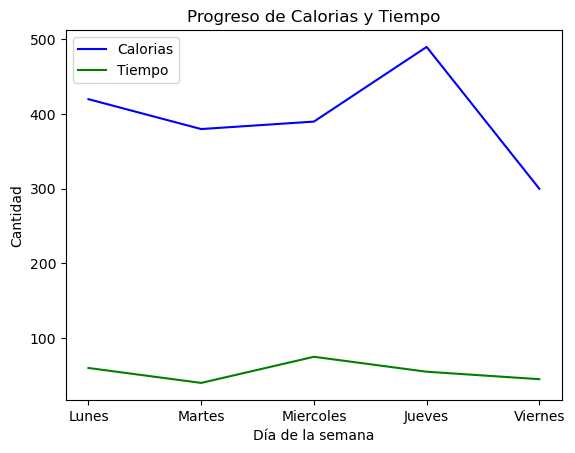

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# se crean los datos el data frame  
data = {'Calorias': [420, 380, 390, 490, 300], 'Tiempo': [60, 40, 75, 55, 45]}
# creamos el indice de data frame con index y guardamos el dataframe en df
df = pd.DataFrame(data, index=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes'])


# añadimos una nueva columna y vemos si las calorias quemadas por hora son mayor a 400 si si poner true y si no false sobre el data frame
#lo guardamos en la nueva columna
df['reto calorias por hora'] = np.where(df['Calorias']/(df['Tiempo']/60) > 400, True, False)
 
# filtramos la nueva columna que solo sea igual a true
filtered_df = df[df['reto calorias por hora'] == True]
# añadimos una nueva columnaa  a este data frame y sacamos el porcentaje
filtered_df['reto cumplido %'] = filtered_df['Calorias'] / (filtered_df['Tiempo'] / 60) / 400 * 100

# imprimimos el data frame
print(df)

# Calcular la media, mediana y desviación estandar de columna calorias con el .mean . median y .std
print("\nMedia de Calorias:", df['Calorias'].mean())
print("Mediana de Calorias:", df['Calorias'].median())
print("Desviacion estandar de Calorias:", df['Calorias'].std())

# Calcular la media, mediana y desviación estandar de columna tiempo con el .mean . median y .std
print("\nMedia de Tiempo:", df['Tiempo'].mean())
print("Mediana de Tiempo:", df['Tiempo'].median())
print("Desviacion estandar de Tiempo:", df['Tiempo'].std())

print("\n", filtered_df)

# creamos las lineas de la grafica
plt.plot(df['Calorias'], label='Calorias', color='blue')
plt.plot(df['Tiempo'], label='Tiempo', color='green')

# ponemos el titulo de los ejes
plt.title('Progreso de Calorias y Tiempo')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad')

# imprimimos que significa cada linea
plt.legend()

# mostramos la grafica
plt.show()


**Explicacion:**
en este caso se me complico como hacer un nuevo data frame filtrando el pasado, me muestra una advertencia pero no entiendo por que

### Ejercicio 5

El fichero coches.csv contiene información sobre los modelos de coches vendidos en USA durante un determinado año. Se pide:

* A.- Crear un DataFrame a partir del fichero anterior.
* B.- Eliminar las filas con valores desconocidos y mostrar el número de filas del DataFrame resultante.
* C.- Crear una columna con el precio en euros (cambio 1$ = 0.94€)
* D.- Mostrar las 10 últimas filas del DataFrame.
* E.- Mostrar el número de marcas de coches que contiene el DataFrame.
* F.- Mostrar el número de modelos de cada marca que hay en el DataFrame, de mayor a menor frecuencia.
* G.- Mostrar cuál es la marca y el modelo del coche más caro.
* H.- Mostrar el precio medio en euros de los coches agrupando por marca y ordenando de menor a mayor precio.
* I.- Gráfica el diagrama de barras del porcentaje de modelos de cada marca.
* J.- Gráfica el diagrama de dispersión de la potencia y el precio.




numero de filas: 421
     Marca                   Modelo   Tipo  Potencia   Precio  Precio_EUR
0    Acura                      MDX    SUV     265.0  33337.0    31336.78
1    Acura           RSX Type S 2dr  Sedan     200.0  21761.0    20455.34
2    Acura                  TSX 4dr  Sedan     200.0  24647.0    23168.18
3    Acura                   TL 4dr  Sedan     270.0  30299.0    28481.06
4    Acura               3.5 RL 4dr  Sedan     225.0  39014.0    36673.16
..     ...                      ...    ...       ...      ...         ...
423  Volvo  C70 LPT convertible 2dr  Sedan     197.0  38203.0    35910.82
424  Volvo  C70 HPT convertible 2dr  Sedan     242.0  40083.0    37678.02
425  Volvo               S80 T6 4dr  Sedan     268.0  42573.0    40018.62
426  Volvo                      V40  Wagon     170.0  24641.0    23162.54
427  Volvo                     XC70  Wagon     208.0  33112.0    31125.28

[421 rows x 6 columns]
     Marca                   Modelo   Tipo  Potencia   Precio  Prec

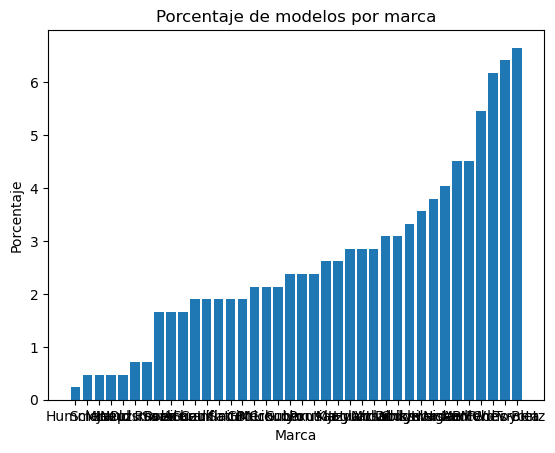

<Figure size 1000x600 with 0 Axes>

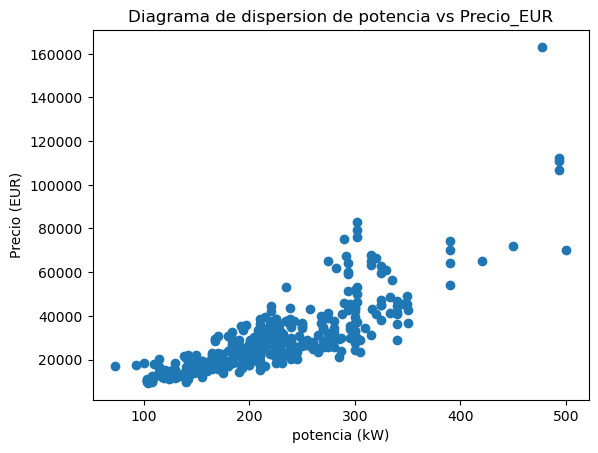

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# cargamos y leemos el archivo CSV al df
df = pd.read_csv('coches.csv')

# usamos el . dropna para eliminar filas con valores desconocidos
df = df.dropna()

# imprimimos el numero de filas totales antes de las eliminadas
print("numero de filas:", len(df))

# creamos una nueva columna agregando el nuevo precio en euros
df['Precio_EUR'] = df['Precio'] * 0.94

# imprimimos el data frame
print(df)

#imprimimos las ultimas 10 filas del data frame con el .tail
print(df.tail(10))

# con el .nunique contamos los valores unicos sobre la columna marca
print("\nEl numero de marcas que hay son:", df["Marca"].nunique())

# contamos e imprimimos los valores en los que se repite mas veces la marca del carro
#con el .value counts contamos y con el .sort values le decimos que de manera asendente
model_counts = df['Marca'].value_counts().sort_values(ascending=False)
print("\n El numero de modelo de cada marca es:")
print( "\n", model_counts)

# para la columna del precio en euros le decimos que ordene los valores de mayor a menor y con el iloc seleccionamos el primer valor
carro_mas_caro = df.sort_values('Precio_EUR', ascending=False).iloc[0]
# aqui concatenamos con + ' ' + el valor de la primer fila que esta en la columna de marca con la de la coluna de modelo
marca_y_modelo = carro_mas_caro['Marca'] + ' ' + carro_mas_caro['Modelo']
# imprimimos el valor
print("\n La marca y el modelo del carro mas caro es:")
print(marca_y_modelo)

# seleccionamos el grupo por marca del data frame, seleccionamos la columna del precio en euros y sasamos el promedio
#con el .sort ordenamos los valores de forma asendente
prom_precio_por_marca = df.groupby('Marca')['Precio_EUR'].mean().sort_values()
print("\n Precio medio en euros de los coches agrupando por marca:")
print(prom_precio_por_marca)

#calcula el porcentaje de modelos para cada marca
brand_percentages = (df.groupby('Marca').size() / len(df) * 100).sort_values()

# imprimimos la grafica de barrras
plt.bar(brand_percentages.index, brand_percentages.values)

# ajustamos los titulos
plt.title('Porcentaje de modelos por marca')
plt.xlabel('Marca')
plt.ylabel('Porcentaje')

# Ajustamos los valores verticales para vizualizar la grafica
plt.figure(figsize=(10, 6)) 

# mostramos la grafica
plt.show()

# creamos el Diagrama de dispersion de potencia vs Precio_EUR
plt.scatter(df['Potencia'], df['Precio_EUR'])

# ajustamos los titulos poniendoles titulo
plt.title('Diagrama de dispersion de potencia vs Precio_EUR')
plt.xlabel('potencia (kW)')
plt.ylabel('Precio (EUR)')

# imprimimos
plt.show()

 **Explicacion** 
 No entendi como sacar el porcentaje de modelos para cada marca no se a que se refiere y la grafica no se como editar los titulos de las marcas al ser una cantidad grande de datos 